# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [136]:
#Identify the most relevant car attributes to trade cars . Also, design a model to estimate the market price for cars.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [356]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from scipy import stats

import seaborn as sns
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

#We read the vehicles.csv file and uploaded to a Data frame. 
vehicles_data = pd.read_csv('vehicles.csv')
vehicles_data.shape

#The Data frame contains 426,880 rows and 18 columns.


(426880, 18)

In [357]:
#Activity 1.	Analyze the type of data and description
vehicles_data.head(10)

#Step 1.1: Detect duplicates
duplicates = vehicles_data.duplicated()
print("Data Frame duplicates: " + str(len(vehicles_data[duplicates])))
#Step 1.1  Outcome: No duplicates

#Step 1.2: Resolve Structural Errors
print("Data Frame Coupon structure" )
print(vehicles_data.dtypes)
#Year field is currently a float, we will make it an Int
vehicles_data['year'] = vehicles_data['year'].fillna(0).astype(int)
#Step 1.2  Outcome: In general terms, all data structures are appropriate, but Year field. So we made it integer.

#Activity 1. Outcome: All the data types are appropriate.

Data Frame duplicates: 0
Data Frame Coupon structure
id                int64
region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object


In [358]:
#2.	Identify any empty values.

#Step 2.1 Detect whether we have empty values
print(vehicles_data.isna().sum())
#Step 2.1 Outcome: We have empty values for manufacturer, model, condition, cylinders, 
#fuel, odometer, title_status, trasmission, VIN, drive, size, type, and paint_color fields

#Step 2.1 Clean the empty values
cleaned_nona_vehicle_data = vehicles_data.dropna()
cleaned_nona_vehicle_data.shape
#Step 2.1 Outcome: No empty values on data set. We have 34868 rows and 18 columns.


id                   0
region               0
price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


(34868, 18)

In [359]:
#3.	Review any unique values in key fields to find rare cases

idcar = (cleaned_nona_vehicle_data['id'] < 0).sum()

if idcar == 0:
    print("All ID are positive? : Yes")
else:
    print("IDs are negative? : Yes")

    
region = np.sort(cleaned_nona_vehicle_data['region'].unique())
print("region - Unique values: "+str(region))

pricepos = (cleaned_nona_vehicle_data['price'] < 0).sum()  

if pricepos == 0:
    print("All prices are positive? : Yes")
else:
    print("Prices are negative? : Yes")

year =( cleaned_nona_vehicle_data['year'] < 0).sum() 

if year == 0:
    print("All years are positive? : Yes")
else:
    print("Years are negative? : Yes")
    
manufacturer = np.sort(cleaned_nona_vehicle_data['manufacturer'].unique()) 
print("Manufacturers: "+str(manufacturer))

model = np.sort(cleaned_nona_vehicle_data['model'].unique())
print("Models: " +str(model))

#The car models have negative numbers and special characters to remove

condition = np.sort(cleaned_nona_vehicle_data['condition'].unique()) 
print("Conditions: "+str(condition))

cylinders = np.sort(cleaned_nona_vehicle_data['cylinders'].unique()) 
print("Cylinders: "+str(cylinders))

fuel = np.sort(cleaned_nona_vehicle_data['fuel'].unique()) 
print("Fuel: "+str(fuel))

odometer = (cleaned_nona_vehicle_data['odometer']<0).sum()

if odometer == 0:
    print("All odometers are positive? : Yes")
else:
    print("Odometers are negative? : Yes")


title_status =( cleaned_nona_vehicle_data['title_status'].unique()) 
print("Title_status: "+str(title_status))

transmission =( cleaned_nona_vehicle_data['transmission'].unique()) 
print("Transmission: "+str(transmission))

#The VINs are manufacturer IDs - we are not going to analyze this field by unique criteria.

drive =np.sort(cleaned_nona_vehicle_data['drive'].unique()) 
print("Drive: "+str(drive))

size = np.sort(cleaned_nona_vehicle_data['size'].unique()) 
print("Size: "+str(size))

typeid = np.sort(cleaned_nona_vehicle_data['type'].unique()) 
print("Type: "+str(typeid))

paint_color = np.sort(cleaned_nona_vehicle_data['paint_color'].unique()) 
print("Paint color: "+str(paint_color))

state = np.sort(cleaned_nona_vehicle_data['state'].unique()) 
print("State: "+str(state))

#To fix the Model, we will remove all special characters or symbols.

pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not a letter, number, or whitespace

# Remove special characters from the 'model' column
cleaned_nona_vehicle_data['model'] = cleaned_nona_vehicle_data['model'].str.replace(pattern,"")
cleaned_nona_vehicle_data = cleaned_nona_vehicle_data.dropna()
print(cleaned_nona_vehicle_data.shape)

#Activity 2. Outcome: All the data is appropriate. We have 34868 rows and 18 columns.


All ID are positive? : Yes
region - Unique values: ['SF bay area' 'abilene' 'akron / canton' 'albany' 'albuquerque'
 'altoona-johnstown' 'amarillo' 'ames' 'anchorage / mat-su' 'ann arbor'
 'annapolis' 'appleton-oshkosh-FDL' 'asheville' 'ashtabula' 'athens'
 'atlanta' 'auburn' 'augusta' 'austin' 'bakersfield' 'baltimore'
 'baton rouge' 'battle creek' 'beaumont / port arthur' 'bellingham'
 'bemidji' 'bend' 'billings' 'binghamton' 'birmingham' 'bismarck'
 'bloomington' 'bloomington-normal' 'boise' 'boone' 'boston' 'boulder'
 'bowling green' 'bozeman' 'brainerd' 'brownsville' 'brunswick' 'buffalo'
 'butte' 'cape cod / islands' 'catskills' 'cedar rapids' 'central NJ'
 'central louisiana' 'central michigan' 'champaign urbana' 'charleston'
 'charlotte' 'charlottesville' 'chattanooga' 'chautauqua' 'chicago'
 'chico' 'cincinnati' 'clarksville' 'cleveland' 'clovis / portales'
 'college station' 'colorado springs' 'columbia' 'columbia / jeff city'
 'columbus' 'cookeville' 'corpus christi' 'corval

(0.0, 120000.0)

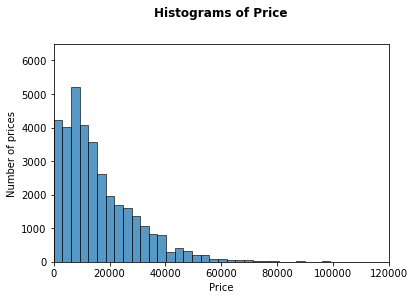

In [360]:
# Activity 3. We will inspect for outliers in numerical fields (year, price, and odometer)

#Step 3.1 : Year - We prepare a histogram and notice that we have outliers for price. 
ax1 = sns.histplot(data=cleaned_nona_vehicle_data, x="price",bins=50)
plt.xlabel("Price")
plt.ylabel("Number of prices")
plt.title("Histograms of Price", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 
plt.xlim(0, 120000) 

#Note: We will normalize the price and remove outliers.

#From simple inspection, we notice that we have some very expensive cars. We will remove cars beyond 40,000 and different from zero

(30677, 18)

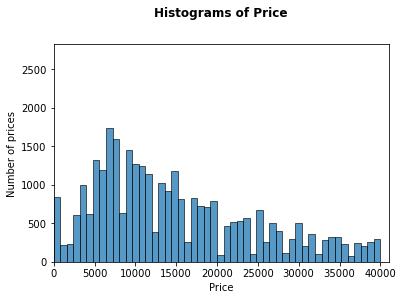

In [361]:
cleaned_nona_vehicle_data['price'] = cleaned_nona_vehicle_data['price'].apply(lambda x: 0 if x > 40000 else x)
cleaned_nona_vehicle_data = cleaned_nona_vehicle_data.loc[cleaned_nona_vehicle_data['price'] != 0]


ax1 = sns.histplot(data=cleaned_nona_vehicle_data, x="price",bins=50)
plt.xlabel("Price")
plt.ylabel("Number of prices")
plt.title("Histograms of Price", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 
plt.xlim(0, 41000) 
cleaned_nona_vehicle_data.shape
#We have removed the expensive cars. Refer to diagram below.
#We will not buy cars before above 40,000 because of low transaction numbers.

(1950.0, 2030.0)

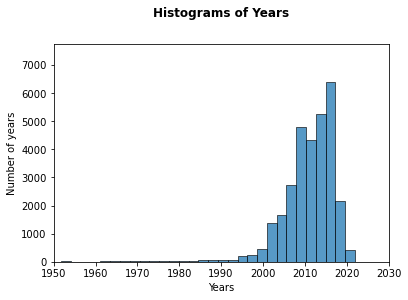

In [362]:
# Activity 3. We will inspect for outliers in numerical fields (year, price, and odometer)

#Step 3.2 : Year - We prepare a histogram and notice that we have outliers for year. 
ax = sns.histplot(data=cleaned_nona_vehicle_data, x="year",bins=50)
plt.xlabel("Years")
plt.ylabel("Number of years")
plt.title("Histograms of Years", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 
plt.xlim(1950, 2030) 

#From simple inspection, we notice that we have some very old cars from 1950. We will only keep cars after 2000.

(29425, 18)

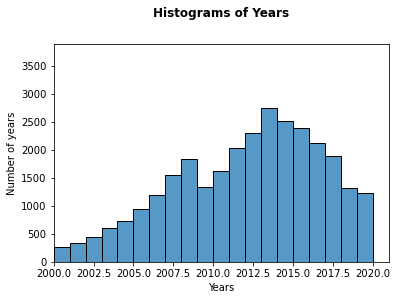

In [363]:

cleaned_nona_vehicle_data['year'] = cleaned_nona_vehicle_data['year'].apply(lambda x: 0 if x < 2000 else x)
cleaned_nona_vehicle_data = cleaned_nona_vehicle_data.loc[cleaned_nona_vehicle_data['year'] != 0]


ax = sns.histplot(data=cleaned_nona_vehicle_data, x="year",bins=range(2000,2021))
plt.xlabel("Years")
plt.ylabel("Number of years")
plt.title("Histograms of Years", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 
plt.xlim(2000, 2021) 
cleaned_nona_vehicle_data.shape
#We have removed the old cars. Refer to diagram below.
#We will not buy cars before 2000 because of low transaction numbers.

(29425, 18)

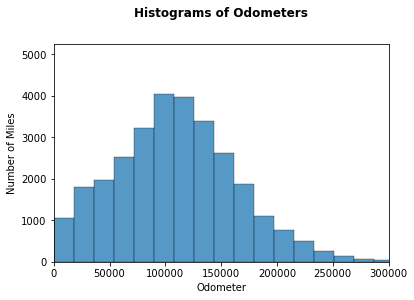

In [364]:
# Activity 3. We will inspect for outliers in numerical fields (year, price, and odometer)

#Step 3.3 : Odometer - We prepare a histogram and notice that we have outliers for odometer. 
ax2 = sns.histplot(data=cleaned_nona_vehicle_data, x="odometer",bins=100)
plt.xlabel("Odometer")
plt.ylabel("Number of Miles")
plt.title("Histograms of Odometers", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 
plt.xlim(0, 300000) 

cleaned_nona_vehicle_data.shape
#From the diagram below, we will not buy cars with more than 200,000 miles because of low transaction numbers.

(27636, 18)

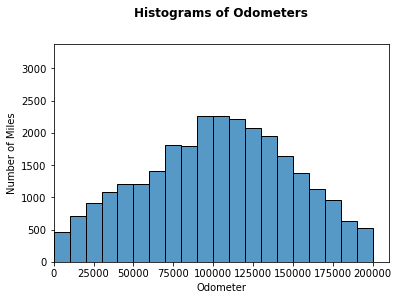

In [365]:
cleaned_nona_vehicle_data['odometer'] = cleaned_nona_vehicle_data['odometer'].apply(lambda x: 0 if x > 200000 else x)
cleaned_nona_vehicle_data = cleaned_nona_vehicle_data.loc[cleaned_nona_vehicle_data['odometer'] != 0]

ax2 = sns.histplot(data=cleaned_nona_vehicle_data, x="odometer",bins=20)
plt.xlabel("Odometer")
plt.ylabel("Number of Miles")
plt.title("Histograms of Odometers", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 
plt.xlim(0, 210000) 

cleaned_nona_vehicle_data.shape
#We have removed the old cars. Refer to diagram below.
#We will not buy cars with more than 200,000 miles because of low transaction numbers.

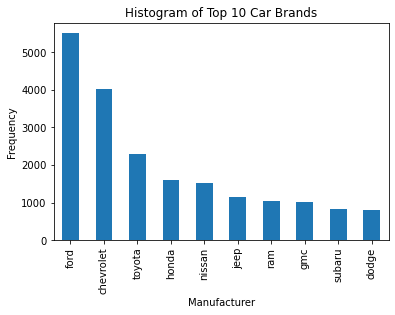

In [366]:
# Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.4 : Manufacturer - We prepared a histogram and inspected what are the most common car brands on market.

top_10 = cleaned_nona_vehicle_data['manufacturer'].value_counts().nlargest(10).index
df_top_10 = cleaned_nona_vehicle_data[cleaned_nona_vehicle_data['manufacturer'].isin(top_10)]

df_top_10['manufacturer'].value_counts().plot(kind='bar')
plt.title('Histogram of Top 10 Car Brands')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.show()

#From the graph below, we observed that people prefers car brands that are most selled (Ford, Chevrolet, and Toyota, Honda, and Toyota)


(0.0, 17746.45)

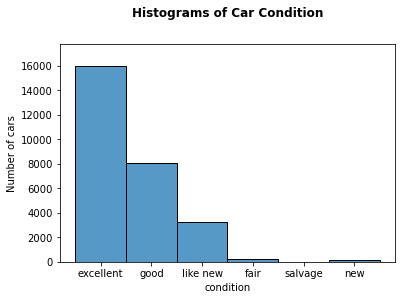

In [367]:
# Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.5 : Condition - We prepared a histogram and inspected what are the most common car condition on market.

ax = sns.histplot(data=cleaned_nona_vehicle_data, x="condition",bins=50)

plt.xlabel("condition")
plt.ylabel("Number of cars")
plt.title("Histograms of Car Condition", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 

#From the graph below, people prefers cars when they are in excellent, good, or like new conditions because they are selled the most.


(0.0, 28963.6)

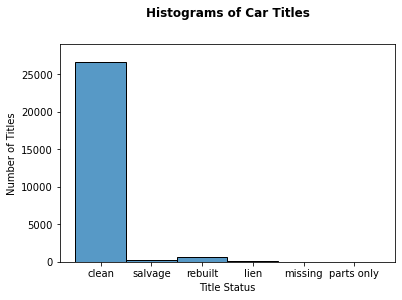

In [368]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.5 : Title Status - We prepared a histogram and inspected what are the most common car title status on market.

ax = sns.histplot(data=cleaned_nona_vehicle_data, x="title_status",bins=50)

plt.xlabel("Title Status")
plt.ylabel("Number of Titles")
plt.title("Histograms of Car Titles", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 

#From the graph below, we observe that people buy car with clean title.  

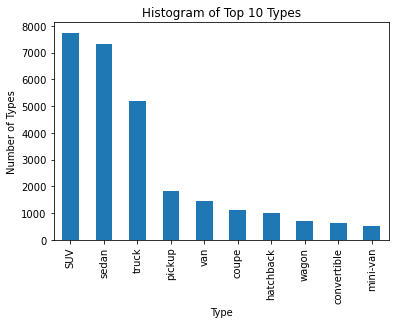

In [369]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.6 : Type - We prepared a histogram and inspected what are the most common car type on market.

top_10_type = cleaned_nona_vehicle_data['type'].value_counts().nlargest(10).index
df_top_10_type = cleaned_nona_vehicle_data[cleaned_nona_vehicle_data['type'].isin(top_10_type)]

df_top_10_type['type'].value_counts().plot(kind='bar')
plt.title('Histogram of Top 10 Types')
plt.xlabel('Type')
plt.ylabel('Number of Types')
plt.show()

#From inspection, we need to concentrated on car with SUV, truck, sedan, pickup, and vans because they are the most selled car types.

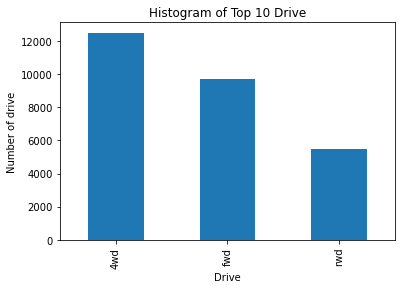

In [370]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.7 :  - We prepared a histogram and inspected what are the most common car drive on market.

top_10_drive = cleaned_nona_vehicle_data['drive'].value_counts().nlargest(10).index
df_top_10_drive = cleaned_nona_vehicle_data[cleaned_nona_vehicle_data['drive'].isin(top_10_drive)]

df_top_10_drive['drive'].value_counts().plot(kind='bar')
plt.title('Histogram of Top 10 Drive')
plt.xlabel('Drive')
plt.ylabel('Number of drive')
plt.show()

#From inspection, all drives are relevant. We will include all the drives

(0.0, 28107.85)

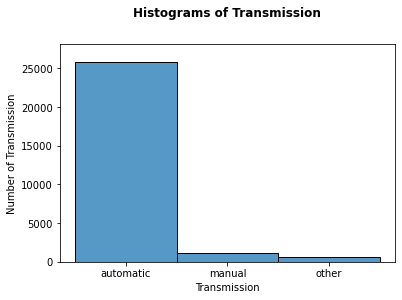

In [371]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.8 :  - We prepared a histogram and inspected what are the most common car transmission on market.

ax = sns.histplot(data=cleaned_nona_vehicle_data, x="transmission",bins=50)

plt.xlabel("Transmission")
plt.ylabel("Number of Transmission")
plt.title("Histograms of Transmission", fontweight='bold', y=1.1)
plt.ylim(0, max(plt.ylim()) + 1000) 

#From inspection, we need to concentrate our analysis in automatic cars

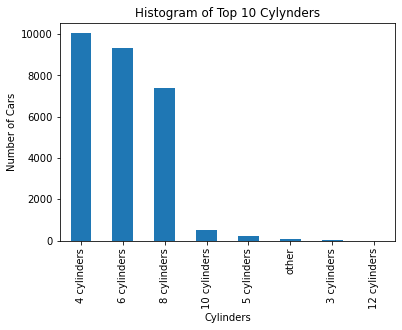

In [372]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.9 :  - We prepared a histogram and inspected what are the most common car cylynders on market.

top_10_cylynders = cleaned_nona_vehicle_data['cylinders'].value_counts().nlargest(10).index
df_top_10_cylinders = cleaned_nona_vehicle_data[cleaned_nona_vehicle_data['cylinders'].isin(top_10_cylynders)]

df_top_10_cylinders['cylinders'].value_counts().plot(kind='bar')
plt.title('Histogram of Top 10 Cylynders')
plt.xlabel('Cylinders')
plt.ylabel('Number of Cars')
plt.show()

#From inspection, we need to concentrate our analysis in 4,6 and 8 cylinder cars.

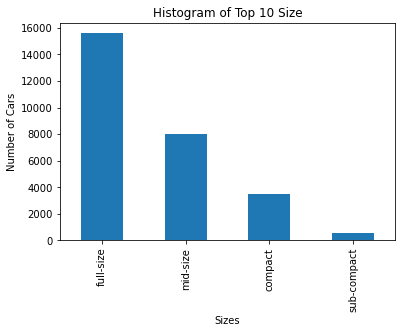

In [373]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.10 : We prepared a histogram and inspected what are the most common car sizes on market.

top_10_size = cleaned_nona_vehicle_data['size'].value_counts().nlargest(10).index
df_top_10_size = cleaned_nona_vehicle_data[cleaned_nona_vehicle_data['size'].isin(top_10_size)]

df_top_10_size['size'].value_counts().plot(kind='bar')
plt.title('Histogram of Top 10 Size')
plt.xlabel('Sizes')
plt.ylabel('Number of Cars')
plt.show()

#From inspection, we will consider all th car sizes

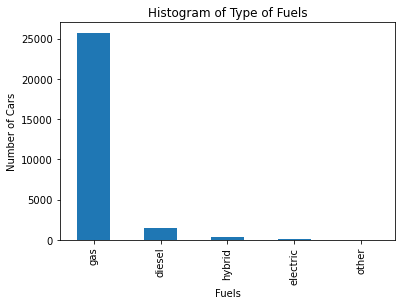

In [374]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.11 :  - We prepared a histogram and inspected what are the car fuels on market.

top_10_fuels = cleaned_nona_vehicle_data['fuel'].value_counts().nlargest(10).index
df_top_10_fuels = cleaned_nona_vehicle_data[cleaned_nona_vehicle_data['fuel'].isin(top_10_fuels)]

df_top_10_fuels['fuel'].value_counts().plot(kind='bar')
plt.title('Histogram of Type of Fuels')
plt.xlabel('Fuels')
plt.ylabel('Number of Cars')
plt.show()

#From inspection, we will consider all the car fuels

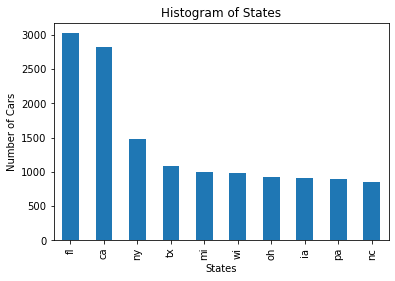

In [375]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.12 :  - We prepared a histogram and inspected what are the states on market.

top_10_state = cleaned_nona_vehicle_data['state'].value_counts().nlargest(10).index
df_top_10_state = cleaned_nona_vehicle_data[cleaned_nona_vehicle_data['state'].isin(top_10_state)]

df_top_10_state['state'].value_counts().plot(kind='bar')
plt.title('Histogram of States')
plt.xlabel('States')
plt.ylabel('Number of Cars')
plt.show()

#From inspection, we will consider the top 10 states.

  state  Count  Percentage  cumulative_sum
0    fl   3023    0.109386        0.109386
1    ca   2817    0.101932        0.211319
2    ny   1484    0.053698        0.265017
3    tx   1078    0.039007        0.304024
4    mi   1003    0.036293        0.340317
5    wi    976    0.035316        0.375633
6    oh    921    0.033326        0.408959
7    ia    904    0.032711        0.441670
8    pa    891    0.032241        0.473911
9    nc    850    0.030757        0.504668


Text(0.5, 1.05, "Cummulative percentage of Cars by State with Vertical Line at 50% of the market coverage'")

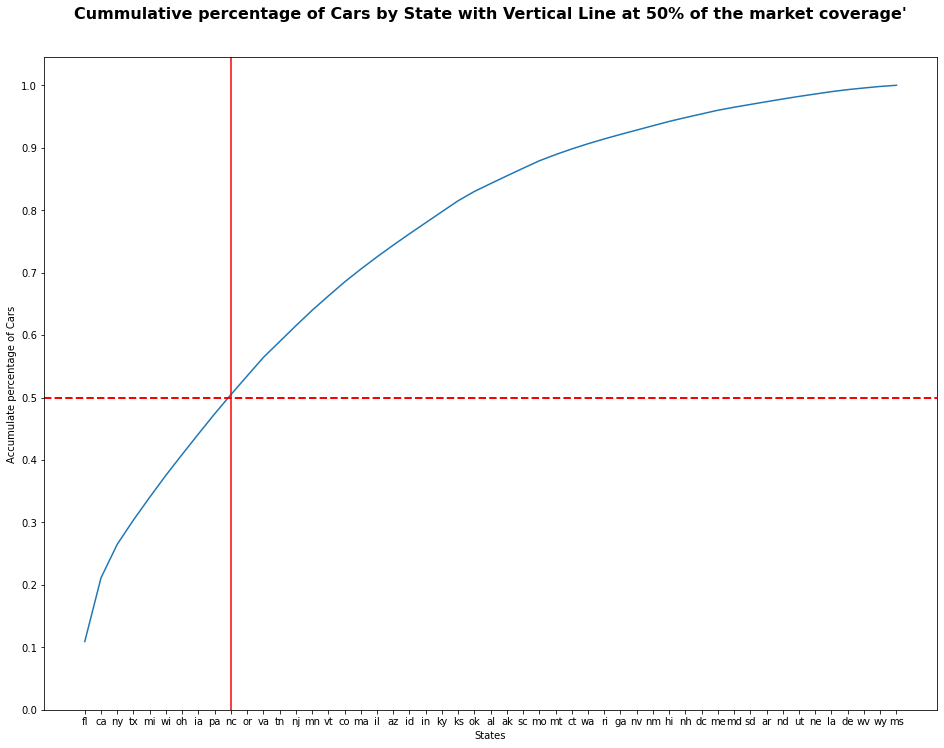

In [376]:
#Activity 3. We will inspect for outliers in descriptive fields (manufacturer, condition, title status, transmission, drive, cylynders)

#Step 3.13 :  We prepared a diagram to identify how many states cover 50% of the market.

state_table_1 = cleaned_nona_vehicle_data['state'].value_counts().reset_index()
state_table_1.columns = ['state', 'Count']
Total = state_table_1['Count'].sum()

state_table_1['Percentage'] = state_table_1['Count'] / Total
state_table_1['cumulative_sum'] = state_table_1['Percentage'].cumsum()


plt.figure(figsize=(16, 12))
ax = sns.lineplot(data= state_table_1, x='state', y='cumulative_sum')
ax.axhline(y=0.5, color='r', linestyle='--', linewidth=2)
plt.axvline(x='nc', color='r', linestyle='-', label='y= 50% Intersection')
plt.yticks(np.arange(0, 1.1, 0.1))

print (state_table_1[:][:10])

plt.xlabel("States")
plt.ylabel("Accumulate percentage of Cars")
plt.title("Cummulative percentage of Cars by State with Vertical Line at 50% of the market coverage'", fontweight='bold',fontsize = 16, y=1.05)

#From diagrams and tables, we will prioritize only the first 10 states that covers 50% of the market.


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [377]:
#Activity 4: Data normalization and dummy fields

#Step 4.1: Price, year, odometer standarization.

cleaned_nona_vehicle_data_std = cleaned_nona_vehicle_data
# Create a StandardScaler object
scaler = StandardScaler()
numeric_data = cleaned_nona_vehicle_data[['price','year','odometer']]

# Fit the scaler to the data
scaler.fit(numeric_data)

# Transform the data
standardized_data = scaler.transform(numeric_data)

# Create a new DataFrame with the standardized data
temp= pd.DataFrame(standardized_data, columns=numeric_data.columns)

cleaned_nona_vehicle_data_std.reset_index(drop=True, inplace=True)
temp.reset_index(drop=True, inplace=True)

cleaned_nona_vehicle_data_std[['price','year','odometer']] = temp[['price','year','odometer']]
cleaned_nona_vehicle_data_std

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7316482063,birmingham,-1.161856,-2.203665,toyota,echo,excellent,4 cylinders,gas,1.129613,clean,automatic,JTDBT123520243495,fwd,compact,sedan,blue,al
1,7315946365,birmingham,-0.653749,-0.870841,mazda,miata mx5,excellent,4 cylinders,gas,-0.988039,clean,automatic,JM1NC25F570128735,rwd,compact,convertible,white,al
2,7315354216,birmingham,-0.658830,-0.204430,ford,f150,excellent,6 cylinders,gas,1.323498,clean,automatic,1FTMF1CM6BKD55331,fwd,full-size,truck,white,al
3,7315110575,birmingham,-0.613100,-0.870841,mercedes-benz,benz c350,good,6 cylinders,gas,0.579692,clean,automatic,WDDGF56X68F140907,rwd,full-size,sedan,silver,al
4,7314967754,birmingham,-0.826505,-1.092978,lexus,rx350,good,6 cylinders,gas,1.689725,clean,automatic,2T2GK31U57C025466,fwd,mid-size,SUV,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27631,7303328776,wyoming,0.971687,0.461982,gmc,sierra,good,8 cylinders,gas,0.563513,clean,automatic,1GT423CG6EF114143,4wd,full-size,truck,white,wy
27632,7303314912,wyoming,0.819254,0.684119,ford,f150 xlt 4x4,like new,8 cylinders,gas,0.952855,clean,automatic,1FTFX1EF5FFC24427,4wd,full-size,truck,black,wy
27633,7303227528,wyoming,-0.247771,0.906257,chevrolet,cruze lt,like new,4 cylinders,gas,-0.892669,clean,automatic,1G1BE5SM0G7266569,fwd,compact,sedan,silver,wy
27634,7303114896,wyoming,1.785065,0.461982,ford,f350 xlt,excellent,8 cylinders,diesel,1.121901,clean,automatic,1FT8W3DT3EEB41548,4wd,full-size,pickup,brown,wy


In [378]:
#Activity 4: Data normalization and dummy fields

#Step 4.2: Data filtering for the descriptive fields

#Base on the histogram analysis, we need to set some business policies.

# 1. We only buy and sell Ford, Chevrolet, Toyota, Honda, or Nissan (the top five brands)
# 2. We only buy and sell cars in excellent, like new, or good conditions
# 3. We only buy and sell cars with clean titles
# 4. We only buy and sell cars type SUV, truck, sedan, pickup, or van
# 5. We only buy and sell cars with automatic transition.
# 6. We only buy and sell cars with 8,6, and 4 cylinders
# 7. We buy and sell cars with all drives (fwd, rwd, 4wd)
# 8. We only buy and sell cars from Florida, California, New York, Texas, Michigan, Wisconsin, Ohio, Iowa, and Pennsilvany, North Charlotte, and Oregon

#Note: We are applying filters for 1, 4, and 8. For all the others, we do not need to apply filters because data already exhibit these values after 1,4, and 8 filters.

cleaned_nona_vehicle_data_std = cleaned_nona_vehicle_data_std.query('manufacturer == "toyota" or manufacturer == "chevrolet" or manufacturer  == "honda" or  manufacturer  == "ford" or manufacturer == "nissan" or manufacturer == "dodge"')
cleaned_nona_vehicle_data_std = cleaned_nona_vehicle_data_std.query('type == "SUV" or type == "truck" or type == "sedan" or type == "pickup" or type == "van" or type == "coupe"')
cleaned_nona_vehicle_data_std = cleaned_nona_vehicle_data_std.query('state == "fl" or state == "ca" or state == "ny" or state == "tx" or state == "mi" or state == "wi" or state == "oh" or state == "ia" or state == "pa" or state == "nc" or state == "or"')

cleaned_nona_vehicle_data_std.shape

#We have 7478 rows with 18 columns

(7478, 18)

In [459]:
#Activity 4: Data normalization and dummy fields

#Step 4.3: Dummy fields preparation and statistical significance of dummies (p-value method)

car_data_w_dummies = cleaned_nona_vehicle_data_std
car_data_w_dummies = car_data_w_dummies.reset_index(drop=True, inplace=False)

seven_features_data = pd.DataFrame(car_data_w_dummies[['manufacturer','condition','cylinders','drive','type','title_status','transmission','size','fuel','state']])

dummy_listing_significance = pd.DataFrame(columns=['Dummy_name','Value','Significant'])


#Preparing dummy variables for manufacturer
unique_values, index_positions = np.unique(seven_features_data['manufacturer'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['manufacturer'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
#car_data_w_dummies

#Checking p value for statistic significance between price and top 5 car manufacturers
correlation_coefficient, p_value_ford = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['ford'])
if (p_value_ford<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'ford', 'Value': p_value_ford , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_chevy = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['chevrolet'])
if (p_value_chevy<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'chevrolet', 'Value': p_value_chevy , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


correlation_coefficient, p_value_toyota = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['toyota'])
if (p_value_toyota<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'toyota', 'Value': p_value_toyota , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


correlation_coefficient, p_value_honda = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['honda'])
if (p_value_honda<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'honda', 'Value': p_value_honda , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_nissan = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['nissan'])
if (p_value_nissan<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'nissan', 'Value': p_value_nissan , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


#Preparing dummy variables for condition
unique_values, index_positions = np.unique(seven_features_data['condition'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['condition'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
car_data_w_dummies

#Checking p value for statistic significance between price and top 3 car conditions
correlation_coefficient, p_value_excellent = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['excellent'])
if (p_value_excellent<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'excellent', 'Value': p_value_excellent , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_good = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['good'])
if (p_value_good<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'good', 'Value': p_value_good , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_like_new = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['like new'])
if (p_value_like_new<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'like_new', 'Value': p_value_like_new , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


#Preparing dummy variables for cylinders
unique_values, index_positions = np.unique(seven_features_data['cylinders'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['cylinders'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
car_data_w_dummies

#Checking p value for statistic significance between price and top 3 cylinder numbers
correlation_coefficient, p_value_4_cylinders = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['4 cylinders'])
if (p_value_4_cylinders<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': '4_cylinders', 'Value': p_value_4_cylinders , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_6_cylinders = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['6 cylinders'])
if (p_value_6_cylinders<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': '6_cylinders', 'Value': p_value_6_cylinders , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_8_cylinders = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['8 cylinders'])
if (p_value_8_cylinders<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': '8_cylinders', 'Value': p_value_8_cylinders , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

#Preparing dummy variables for drive
unique_values, index_positions = np.unique(seven_features_data['drive'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['drive'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
car_data_w_dummies

#Checking p value for statistic significance between price and 3 drives
correlation_coefficient, p_value_4wd = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['4wd'])
if (p_value_4wd<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': '4wd', 'Value': p_value_4wd , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_fwd = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['fwd'])
if (p_value_fwd<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'fwd', 'Value': p_value_fwd , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_rwd = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['rwd'])
if (p_value_rwd<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'rwd', 'Value': p_value_rwd , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


#Preparing dummy variables for type
unique_values, index_positions = np.unique(seven_features_data['type'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['type'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
car_data_w_dummies

#Checking p value for statistic significance between price and 5 types
correlation_coefficient, p_value_SUV = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['SUV'])
if (p_value_SUV<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'SUV', 'Value': p_value_SUV , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_truck = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['truck'])
if (p_value_truck<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'truck', 'Value': p_value_truck , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_sedan = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['sedan'])
if (p_value_sedan<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'sedan', 'Value': p_value_sedan , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


correlation_coefficient, p_value_pickup = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['pickup'])
if (p_value_pickup<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'pickup', 'Value': p_value_pickup , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_van = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['van'])
if (p_value_van<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'van', 'Value': p_value_van , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


#Preparing dummy variables for title
unique_values, index_positions = np.unique(seven_features_data['title_status'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['title_status'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
#car_data_w_dummies

#Checking p value for statistic significance between price and Title status
correlation_coefficient, p_value_clean = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['clean'])
if (p_value_clean<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'clean title', 'Value': p_value_clean , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

#Preparing dummy variables for transmission
unique_values, index_positions = np.unique(seven_features_data['transmission'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['transmission'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
#car_data_w_dummies

#Checking p value for statistic significance between price and automatic trasnmission
correlation_coefficient, p_value_automatic = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['automatic'])
if (p_value_automatic<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'automatic transition', 'Value': p_value_automatic , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)
#print ("Automatic transmission is statistically significant to explain car price value")


#Preparing dummy variables for car size
unique_values, index_positions = np.unique(seven_features_data['size'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['size'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
#car_data_w_dummies

#Checking p value for statistic significance between price and top 5 car brands
correlation_coefficient, p_value_compact = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['compact'])
if (p_value_compact<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'compact', 'Value': p_value_compact , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_fullsize = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['full-size'])
if (p_value_fullsize<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'fullsize', 'Value': p_value_fullsize , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_midsize = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['mid-size'])
if (p_value_midsize<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'midsize', 'Value': p_value_midsize , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_subcompact = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['sub-compact'])
if (p_value_subcompact<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'subcompact', 'Value': p_value_subcompact , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


#Preparing dummy variables for fuel
unique_values, index_positions = np.unique(seven_features_data['fuel'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['fuel'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
#car_data_w_dummies

#Checking p value for statistic significance between price and top 5 car brands
correlation_coefficient, p_value_gas = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['gas'])
if (p_value_gas<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'gas', 'Value': p_value_gas , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_hybrid = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['hybrid'])
if (p_value_hybrid<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'hybrid', 'Value': p_value_hybrid , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


correlation_coefficient, p_value_diesel = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['diesel'])
if (p_value_diesel<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'diesel', 'Value': p_value_diesel , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_electric = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['electric'])
if (p_value_electric<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'electric', 'Value': p_value_electric , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


#Preparing dummy variables for states
unique_values, index_positions = np.unique(seven_features_data['state'], return_index=True)
dummies = pd.get_dummies(car_data_w_dummies['state'])
dummies.iloc[index_positions,:]
car_data_w_dummies = pd.concat([car_data_w_dummies,dummies], axis = 1)
car_data_w_dummies

#Checking p value for statistic significance between price and states 
correlation_coefficient, p_value_fl = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['fl'])
if (p_value_fl<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Florida', 'Value': p_value_fl , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_ca = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['ca'])
if (p_value_ca<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'California', 'Value': p_value_ca , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_ny = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['ny'])
if (p_value_ny<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Newyork', 'Value': p_value_ny , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_tx = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['tx'])
if (p_value_tx<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Texas', 'Value': p_value_tx , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_mi = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['mi'])
if (p_value_mi<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Michigan', 'Value': p_value_mi , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


correlation_coefficient, p_value_wi = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['wi'])
if (p_value_wi<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Wisconsin', 'Value': p_value_wi , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_oh = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['oh'])
if (p_value_oh<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Ohio', 'Value': p_value_oh , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_ia = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['ia'])
if (p_value_ia<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Iowa', 'Value': p_value_ia , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)

correlation_coefficient, p_value_pa = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['pa'])
if (p_value_pa<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'Pennsylvania', 'Value': p_value_pa , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


correlation_coefficient, p_value_nc = stats.pearsonr(car_data_w_dummies['price'], car_data_w_dummies['nc'])
if (p_value_nc<0.05):
    significant = "Yes"
else:
    significant = "No"

new_row_data = {'Dummy_name': 'North Carolina', 'Value': p_value_nc , 'Significant': significant}
dummy_listing_significance.loc[len(dummy_listing_significance)] = pd.Series(new_row_data)


print("Dummy Variable - Summary Table of Statistic significance")

print(dummy_listing_significance)

print ("Note 1: Excellent and good car conditions are NOT statistically significant to explain car price value")
print ("Note 2: 6 cylinder cars are NOT statistically significant to explain car price value")
print ("Note 3: electric cars are NOT statistically significant to explain car price value")
print("Note 4: California, New York, Texas, and Iowa states are NOT statistically significant to explain car price value")


Dummy Variable - Summary Table of Statistic significance
              Dummy_name          Value Significant
0                   ford   6.371052e-62         Yes
1              chevrolet   2.111693e-20         Yes
2                 toyota   1.822208e-05         Yes
3                  honda   2.655746e-46         Yes
4                 nissan   4.682077e-51         Yes
5              excellent   4.335286e-01          No
6                   good   4.570276e-01          No
7               like_new   3.799991e-07         Yes
8            4_cylinders  6.829970e-273         Yes
9            6_cylinders   5.908506e-01          No
10           8_cylinders  8.657067e-265         Yes
11                   4wd  2.541881e-183         Yes
12                   fwd   0.000000e+00         Yes
13                   rwd   1.080070e-37         Yes
14                   SUV   5.147546e-26         Yes
15                 truck  6.086504e-303         Yes
16                 sedan   0.000000e+00         Yes
17     

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [404]:
#Activity 5: Lets create three sets (training, validation, testing).

#Lets calculate three data set sizes
car_data=car_data_w_dummies

population = car_data.shape[0]
training_size = int(round(population*0.75,0))
validation_size = int(round(population*0.15,0))
testing_size = population - training_size - validation_size

# Let's shuffle the data and prepare the three sets (training/validation/testing)

car_data = shuffle(car_data)
car_data.reset_index(inplace=True)
car_training_data, car_validation_data, car_test_data = np.split(car_data, [training_size, validation_size+training_size])

# For each set, we will prepare the Y and Xi
y_car_training_data = car_training_data['price']
x_car_training_data = car_training_data.drop('price', axis=1, inplace=False)
y_car_validation_data = car_validation_data['price']
x_car_validation_data = car_validation_data.drop('price', axis=1, inplace=False)
y_car_testing_data = car_training_data['price']
x_car_testing_data = car_training_data.drop('price', axis=1, inplace=False)

car_data_no_test = pd.concat([car_training_data,car_validation_data], ignore_index=True)


In [405]:
#Now that we have our data, we will prepare 6 models to estimate the market price for a car. 
# The models considered different car characteristics to estimate the car value.

# Model 1. Car year and odometer (Simple linear regression)
# Model 2.1. Car year, year^2, year*odometer, odometer^2, odometer (Ridge model)
# Model 2.2. Car year, year^2, year*odometer, odometer^2, odometer (Lasso model)
# Model 3.1. Car year, odometer, year^2, year*odometer, odometer^2, year^3, year^2, odometer, year, odometer^2, odometer^3 (Ridge model)
# Model 3.2. Car year, odometer, year^2, year*odometer, odometer^2, year^3, year^2, odometer, year, odometer^2, odometer^3 (Lasso model)
# Model 4. Car year, odometer,manufacturer, condition, cylinders,transmission, Title Status, size, state, drive and type.


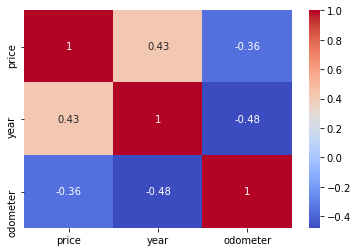

In [406]:
# As a prevalidation we will run a correlation matrix to see what numeric characteristics correlate with car price

corr_matrix = car_data_no_test[['price','year','odometer']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

#We can observe that the car year and the car odometer has a signigicant correlation with price (correlation above 30%)

# 1. Price and Year fields have a positive corretaion. The higher the car year, the higher the car price. 
#The most recent cars still keep most of his value, and therefore they are more expensive.

#2. Price and Odometer fields have a negative correlation. The higher the car odometer value, the lower the car price.
#The odometer value indicates the level of car usage. The more kilometers in the odometer, the older the car. 
#Therefore, the car price is lower.

In [419]:
# Model 1. Car year and odometer (Simple linear regression)

Model1 = LinearRegression(fit_intercept = False)

x_training = x_car_training_data[['year','odometer']]
Model1.fit(x_training,y_car_training_data)

x_validation = x_car_validation_data[['year','odometer']] 

train_preds = Model1.predict(x_training)
test_preds = Model1.predict(x_validation)

train_mse = mean_squared_error(y_car_training_data, train_preds)
test_mse = mean_squared_error(y_car_validation_data, test_preds)

print("Model 1")
print("Thetas"+ str(Model1.coef_))
print("train_mse: "+str(train_mse))
print("val_mse: "+str(test_mse))
#

Model 1
Thetas[ 0.35215933 -0.20018734]
train_mse: 0.855805248552781
val_mse: 0.8918446010410378


In [408]:
# Model 2.1. Car year, year^2, year*odometer, odometer^2, odometer (Ridge model- degree 2)

#Lets identify the best model with Ridge regulation approach with degree 2
try:
    pipelined_model = Pipeline ([
        ('pipe_transform', PolynomialFeatures(degree = 2, include_bias = False)),
        ('scale', StandardScaler()),
        ('pipe_regression', Ridge())
    ])
    parameters_to_try = {'pipe_regression__alpha': 10**np.linspace(-5,4,10)}

    training_indices= list(x_car_training_data.index)
    dev_indices = list (x_car_validation_data.index)

    Model_2_1 = GridSearchCV (estimator = pipelined_model,
                                 param_grid = parameters_to_try,
                                 scoring = "neg_mean_squared_error",
                                 cv = [[training_indices, dev_indices]]
    )

    
#Lets train the model and find the best model

    Model_2_1.fit(car_data_no_test[["year","odometer"]],car_data_no_test["price"])
    best_model = Model_2_1.best_estimator_

#Lets calculate the Thetas for Ridge approach and save it in a Dataframe
    
    Thetas_Ridge = pd.DataFrame([best_model.named_steps["pipe_regression"].coef_],
    columns = best_model.named_steps["pipe_transform"].get_feature_names_out(["year","odometer"]))
    print("Ridge - Thetas degree 2")
    print(Thetas_Ridge[Thetas_Ridge.columns[(abs(Thetas_Ridge)>0.00001).any()]])

#Lets calculate the MSE error
    x_car_training_data_num = x_car_training_data[["year","odometer"]] 
    x_car_validation_data_num = x_car_validation_data[["year","odometer"]] 
    train_preds = best_model.predict(x_car_training_data_num)
    test_preds = best_model.predict(x_car_validation_data_num)
    train_mse = mean_squared_error(y_car_training_data, train_preds)
    test_mse = mean_squared_error(y_car_validation_data, test_preds)
    print("Model 2.1.")
    print("train_mse: "+str(train_mse))
    print("val_mse: "+str(test_mse))

except IndexError as e:
    print("IndexError occurred:", e)

Ridge - Thetas degree 2
       year  odometer    year^2  year odometer  odometer^2
0  0.443853 -0.146422  0.163274       0.178524    0.073399
Model 2.1.
train_mse: 0.8219672346309855
val_mse: 0.8479308729551316


In [409]:
# Model 2.2. Car year, year^2, year*odometer, odometer^2, odometer (Lasso model)

#Lets identify the best model with Lasso regulation approach with degree 2

pipelined_model_lasso = Pipeline ([
        ('pipe_transform', PolynomialFeatures(degree = 2, include_bias = False)),
        ('scale', StandardScaler()),
        ('pipe_lasso', Lasso())
    ])

parameters_to_try_lasso = {'pipe_lasso__alpha': 10**np.linspace(-5,4,10)}


Model_2_2 = GridSearchCV (estimator = pipelined_model_lasso,
                                 param_grid = parameters_to_try_lasso,
                                 scoring = "neg_mean_squared_error",
                                 cv = [[training_indices, dev_indices]]
    )

#Lets train the model and find the best model
Model_2_2.fit(car_data_no_test[["year","odometer"]],car_data_no_test["price"])
best_model_lasso = Model_2_2.best_estimator_

#Lets calculate the Thetas for Lasso and save it in a Dataframe
Thetas_Lasso = pd.DataFrame([best_model_lasso.named_steps["pipe_lasso"].coef_],
columns = best_model_lasso.named_steps["pipe_transform"].get_feature_names_out(["year","odometer"]))
print("Lasso 2 - Thetas")
print(Thetas_Lasso[Thetas_Lasso.columns[(abs(Thetas_Lasso)>0.00001).any()]])

#Lets calculate the MSE error
train_preds = best_model_lasso.predict(x_car_training_data_num)
test_preds = best_model_lasso.predict(x_car_validation_data_num)
train_mse = mean_squared_error(y_car_training_data, train_preds)
test_mse = mean_squared_error(y_car_validation_data, test_preds)

print("Model 2.2")
print("train_mse: "+str(train_mse))
print("val_mse: "+str(test_mse))


Lasso 2 - Thetas
      year  odometer    year^2  year odometer  odometer^2
0  0.44383 -0.146426  0.163248       0.178493    0.073383
Model 2.2
train_mse: 0.8219667974339753
val_mse: 0.8479330637976876


In [410]:
# Model 3.1. Car year, odometer, year^2, year*odometer, odometer^2, year^3, year^2, odometer, year, odometer^2, odometer^3 (Ridge model)

try:
#Lets identify the best model with Ridge regulation approach with degree 3
    pipelined_model = Pipeline ([
        ('pipe_transform', PolynomialFeatures(degree = 3, include_bias = False)),
        ('scale', StandardScaler()),
        ('pipe_regression', Ridge())
    ])
#    parameters_to_try = {'pipe_regression__alpha': [0.001,0.1, 1,100,1000]}
    parameters_to_try = {'pipe_regression__alpha': 10**np.linspace(-5,4,10)}

    training_indices= list(car_training_data.index)
    dev_indices = list (car_validation_data.index)

    Model_3_1 = GridSearchCV (estimator = pipelined_model,
                                 param_grid = parameters_to_try,
                                 scoring = "neg_mean_squared_error",
                                 cv = [[training_indices, dev_indices]]
    )

    
#Lets train the model and find the best model

    Model_3_1.fit(car_data_no_test[["year","odometer"]],car_data_no_test["price"])
    #print(Model_3_1.cv_results_)
    best_model = Model_3_1.best_estimator_

#Lets calculate the Thetas for Ridge approach and save it in a Dataframe
    
    Thetas_Ridge = pd.DataFrame([best_model.named_steps["pipe_regression"].coef_],
    columns = best_model.named_steps["pipe_transform"].get_feature_names_out(["year","odometer"]))
    print("Ridge degree 3 - Thetas")
    print(Thetas_Ridge[Thetas_Ridge.columns[(abs(Thetas_Ridge)>0.00001).any()]])

#Lets calculate the MSE error
    x_car_training_data_num = x_car_training_data[["year","odometer"]] 
    x_car_validation_data_num = x_car_validation_data[["year","odometer"]] 
    train_preds = best_model.predict(x_car_training_data_num)
    test_preds = best_model.predict(x_car_validation_data_num)
    train_mse = mean_squared_error(y_car_training_data, train_preds)
    test_mse = mean_squared_error(y_car_validation_data, test_preds)
    print("Model 3.1.")
    print("train_mse: "+str(train_mse))
    print("val_mse: "+str(test_mse))

except IndexError as e:
    print("IndexError occurred:", e)


Ridge degree 3 - Thetas
       year  odometer    year^2  year odometer  odometer^2    year^3  \
0  0.319614 -0.222151  0.294005       0.295941    0.107683  0.242171   

   year^2 odometer  year odometer^2  odometer^3  
0         0.191006         0.062774    0.006376  
Model 3.1.
train_mse: 0.8129469225576935
val_mse: 0.8342766578102195


In [411]:
# Model 3.2. Car year, odometer, year^2, year*odometer, odometer^2, year^3, year^2, odometer, year, odometer^2, odometer^3 (Lasso model)

#Lasso model

#Lets identify the best model with Lasso regulation approach with degree 3

pipelined_model_lasso = Pipeline ([
        ('pipe_transform', PolynomialFeatures(degree = 3, include_bias = False)),
        ('scale', StandardScaler()),
        ('pipe_lasso', Lasso())
    ])

parameters_to_try_lasso = {'pipe_lasso__alpha': 10**np.linspace(-5,4,10)}


Model_3_2 = GridSearchCV (estimator = pipelined_model_lasso,
                                 param_grid = parameters_to_try_lasso,
                                 scoring = "neg_mean_squared_error",
                                 cv = [[training_indices, dev_indices]]
    )

#Lets train the model and find the best model
Model_3_2.fit(car_data_no_test[["year","odometer"]],car_data_no_test["price"])
best_model_lasso = Model_3_2.best_estimator_

#Lets calculate the Thetas for Lasso and save it in a Dataframe
Thetas_Lasso = pd.DataFrame([best_model_lasso.named_steps["pipe_lasso"].coef_],
columns = best_model_lasso.named_steps["pipe_transform"].get_feature_names_out(["year","odometer"]))
print("Lasso degree 3 - Thetas")
print(Thetas_Lasso[Thetas_Lasso.columns[(abs(Thetas_Lasso)>0.00001).any()]])

#Lets calculate the MSE error
train_preds = best_model_lasso.predict(x_car_training_data_num)
test_preds = best_model_lasso.predict(x_car_validation_data_num)
train_mse = mean_squared_error(y_car_training_data, train_preds)
test_mse = mean_squared_error(y_car_validation_data, test_preds)
print("Model 3.2.")
print("train_mse: "+str(train_mse))
print("val_mse: "+str(test_mse))

Lasso degree 3 - Thetas
       year  odometer    year^2  year odometer  odometer^2    year^3  \
0  0.319686 -0.222015  0.293888       0.295814    0.107629  0.242014   

   year^2 odometer  year odometer^2  odometer^3  
0         0.190855         0.062694    0.006274  
Model 3.2.
train_mse: 0.8129451768066734
val_mse: 0.8342854347796749


In [455]:
# Model 4. Car year, odometer,manufacturer, condition, and cylinders.

Model_4 = LinearRegression(fit_intercept = False)
x1_car_training_data = x_car_training_data.drop(['index','id','manufacturer','region','model','excellent','good','condition','cylinders','fuel','title_status','transmission','manual', 'VIN', 'drive', 'size','type', 'paint_color','state','dodge','fair','salvage','new','3 cylinders','5 cylinders','6 cylinders','10 cylinders','other','rwd','coupe','rebuilt','lien','parts only','sub-compact','hybrid','electric','ca','ny','tx','ia','or'], axis=1, inplace=False)
x1_car_validation_data = x_car_validation_data.drop(['index','id','manufacturer','region','model','excellent','good','condition','cylinders','fuel','title_status','transmission', 'manual','VIN', 'drive', 'size','type', 'paint_color','state','dodge','fair','salvage','new','3 cylinders','5 cylinders','6 cylinders','10 cylinders','other','rwd','coupe','rebuilt','lien','parts only','sub-compact','hybrid','electric','ca','ny','tx','ia','or'], axis=1, inplace=False)
Model_4.fit(x1_car_training_data, y_car_training_data)

Model4_coefficients = pd.DataFrame([Model_4.coef_],columns = x1_car_training_data.columns)

train_preds = Model_4.predict(x1_car_training_data)
test_preds = Model_4.predict(x1_car_validation_data)
train_mse = mean_squared_error(y_car_training_data, train_preds)
test_mse = mean_squared_error(y_car_validation_data, test_preds)

print("Model 4 - Thetas")
print(Model4_coefficients)
print("train_mse: "+str(train_mse))
print("val_mse: "+str(test_mse))


Index(['index', 'id', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state', 'chevrolet', 'dodge',
       'ford', 'honda', 'nissan', 'toyota', 'excellent', 'fair', 'good',
       'like new', 'new', 'salvage', '10 cylinders', '3 cylinders',
       '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', 'other',
       '4wd', 'fwd', 'rwd', 'SUV', 'coupe', 'pickup', 'sedan', 'truck', 'van',
       'clean', 'lien', 'parts only', 'rebuilt', 'salvage', 'automatic',
       'manual', 'other', 'compact', 'full-size', 'mid-size', 'sub-compact',
       'diesel', 'electric', 'gas', 'hybrid', 'other', 'ca', 'fl', 'ia', 'mi',
       'nc', 'ny', 'oh', 'or', 'pa', 'tx', 'wi'],
      dtype='object')
Model 4 - Thetas
        4wd       fwd       SUV    pickup     sedan     truck       van  \
0  0.107208 -0.100161 -0.394611  0.124849 -0.627091  0.122516 -0.245086   



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [441]:
#From the previous stage, we developed 6 models, and they were evaluated based on their accuracy (MSE) to predict the car prices on new data (validation data).
#Based on the MSE indicator, we observed that Model 4 is the most precise (MSE - 0.36), and the one we will use it
# to estimate a car fair value as a reference before deciding purchase new vehicles for sale. Please see the model below.

#   Model 4: Car price = 0.391076 * year + -0.286794 * odometer + 0.299429 * chevrolet + 0.464655 * honda 
#                       + 0.306706 * ford + 0.100224 * nissan + 0.541618 * toyota + 0.113211 * like new
#                       + -0.325709 * 4 cylinders + 0.268954 * 8 cylinders + 0.107208 * 4wd + -0.100161 * fwd
#                       + -0.394611 * SUV + 0.124849 * pickup + -0.627091 * sedan + 0.122516 * truck + -0.245086 * van
#                       + 0.232995 * clean + 0.284541 * automatic + -0.346285 * compact + -0.211594 * mid-size
#                       + 0.601749 * diesel + -0.302762 * gas + -0.264048 * fl + 0.009004 * mi + 0.187235 * nc
#                       + -0.083878 * oh + -0.112694 * pa + -0.026049 * wi

#year = Car year
#odometer = Car mileage
#chevrolet = Dummy variable indicating whether the car was manufactured by Chevrolet
#honda = Dummy variable indicating whether the car was manufactured by Honda
#ford = Dummy variable indicating whether the car was manufactured by Ford
#Nissan = Dummy variable indicating whether the car was manufactured by Nissan
#Toyota = Dummy variable indicating whether the car was manufactured by Toyota
#like new = Dummy variable indicating whether the car condition was "like new"
#4 cylinders = Dummy variable indicating whether the car cylinders was "4 cylinders"
#8 cylinders = Dummy variable indicating whether the car cylinders was "8 cylinders"
#4wd = Dummy variable indicating whether the car drive was "4wd"
#fwd = Dummy variable indicating whether the car drive was "fwd"
#SUV = Dummy variable indicating whether the car type was "SUV"
#pickup = Dummy variable indicating whether the car type was "Pickup"
#sedan = Dummy variable indicating whether the car type was "sedan"
#truck = Dummy variable indicating whether the car type was "truck"
#van = Dummy variable indicating whether the car type was "van"
#clean = Dummy variable indicating whether the car title was "clean"
#automatic = Dummy variable indicating whether the car transmission was "automatic"
#compact = Dummy variable indicating whether the car size was "compact"
#mid-size = Dummy variable indicating whether the car size was "mid-size"
#diesel = Dummy variable indicating whether the car fuel was "diesel"
#gas = Dummy variable indicating whether the car fuel was "gas"
#fl = Dummy variable indicating whether the car state was "Florida"
#mi = Dummy variable indicating whether the car state was "Michigan"
#nc = Dummy variable indicating whether the car state was "New Charlotte"
#oh = Dummy variable indicating whether the car state was "Ohio"
#pa = Dummy variable indicating whether the car state was "Pennsylvania"
#wi = Dummy variable indicating whether the car state was "Winsconsin"


# From Model 4, we observed the following correlation sense between car prices and the car characteristic variables

#Year
#The relationship between Price and Year variables is positive. As the car year value increases, the car price value increments.

#Odometer
#The relationship between Price and Odometer variables is negative. As the car odometer value increases, the car price value decreases. This makes sense as a high milage car cost is lower.

#Manufacturer - chevrolet
#The relationship between Price and "chevrolet" variables is positive. If the car manufacturer is "chevrolet", the car price value increases. This makes sense as Chevy cars are in demand by market based on the dataset. 

#Manufacturer - ford
#The relationship between Price and "ford" variables is positive. If the car manufacturer is "ford", the car price value increases. This makes sense as Ford cars are in demand by market based on the dataset. 

#Manufacturer - honda
#The relationship between Price and "honda" variables is positive. If the car manufacturer is "honda", the car price value increases. This makes sense as Honda cars are in demand by market based on the dataset. 

#Manufacturer - nissan
#The relationship between Price and "nissan" variables is positive. If the car manufacturer is "nissan", the car price value increases. This makes sense as Nissan cars are in demand by market based on the dataset. 

#Manufacturer - toyota
#The relationship between Price and "toyota" variables is positive. If the car manufacturer is "toyota", the car price value increases. This makes sense as Toyota cars are in demand by market based on the dataset. 

#Condition - Like new
#The relationship between Price and "Like new" variables is positive. If the car condition is "like new", the car price value increases. This makes sense as car in like new conditions looks like a new car. 

#Cylinders - 4 cylinders
#The relationship between Price and 4 cylinders variables is negative. If the car cylinders is 4, the car will not have much power. Therefore, the price will decrease.

#Cylinders - 8 cylinders
#The relationship between Price and 8 cylinders variables is positive. If the car cylinders is 8, the car will have plenty of power. Therefore, the price will increase.

#Drive - 4wd
#The relationship between Price and 4wd variables is positive. If the car drive is 4wd, the car will have plenty of power. Therefore, the price will increase.

#Drive - fwd
#The relationship between Price and fwd variables is negative. If the car drive is fwd, the car will have not much power. Therefore, the price will decrease.

#Type - SUV
#The relationship between Price and SUV variables is negative. If the car type is SUV, the price will decrease.

#Type - pickup
#The relationship between Price and pickup variables is posititve. If the car type is pickup, the price will increase.

#Type - sedan
#The relationship between Price and sedan variables is negative. If the car type is pickup, the price will decrease.

#Type - truck
#The relationship between Price and truck variables is posititve. If the car type is truck, the price will increase.

#Type - van
#The relationship between Price and van variables is negative. If the car type is van, the price will decrease.

#Title Status - Clean
#The relationship between Price and Title Status variables is positive. If the car title is clean, the price will increase.

#Transmission - Automatic
#The relationship between Price and Automatic variables is positive. If the car transmission is automatic, the price will increase.

#Size - Compact
#The relationship between Price and Compact variables is negative. If the car size is Compact, the price will decrease.

#Size - full-size
#The relationship between Price and full-size variables is negative. If the car size is full-size, the price will decrease.

#Size - mid-size
#The relationship between Price and mid-size variables is negative. If the car size is mid-size, the price will decrease.

#Fuel - diesel
#The relationship between Price and diesel variables is positive. If the car fuel is diesel, the price will increase.

#Size - gas
#The relationship between Price and gas variables is negative. If the car transmission is gas, the price will decrease.

#State - fl
#The relationship between Price and fl variables is negative. If the state is fl, the price will decrease.

#State - mi
#The relationship between Price and mi variables is negative. If the state is mi, the price will decrease.

#State - nc
#The relationship between Price and nc variables is positive. If the state is nc, the price will increase.

#State - oh
#The relationship between Price and oh variables is negative. If the state is oh, the price will decrease.

#State - pa
#The relationship between Price and pa variables is negative. If the state is pa, the price will decrease.

#State - wi
#The relationship between Price and wi variables is negative. If the state is wi, the price will decrease.


#Based on Model 4, these are the car characteristics preferred by drivers: 

#1. We should target Toyota, Honda, Ford, Chevrolet, or Nissan trucks/ pickups that consumes diesel fuel.   
#2. The car year should be the most recent year possible, in great conditions (like new), and with low mileage.
#3. Additionally, the cars should have 8 cylinders, automatic transmission,and a clean title.
#4. The trucks/pickups should be 4wd from North Charlotte/ Michigan.

#Other characteristics not appreciate by drivers

#5. SUV, sedan, or van cars
#6. Cars with 4 cylinders, and front wheel drive that consumes gas.
#7. Compact, or mid-size cars
#8. Cars from Florida, Pennsilvany, Ohio, or Wisconsin.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
#We conducted an analysis of the car market to identify the main characterisctics of the top selled cars.
#Based on the data, we suggest to implement the following company policies to trade high value cars. 

# 1. We only buy and sell Ford, Chevrolet, Toyota, Honda, or Nissan (the top five brands)
# 2. We only buy and sell cars in "like new" conditions (excellent and good condition cars are not relevant - not statistically significant)
# 3. We only buy and sell cars with clean titles
# 4. We only buy and sell cars type SUV, truck, sedan, pickup, or van
# 5. We only buy and sell cars with automatic transition.
# 6. We only buy and sell cars with 8 and 4 cylinders (6 cylinder cars are not relevant - not statistically significant)
# 7. We buy and sell cars with all drives (fwd, rwd, 4wd)
# 8. We only buy and sell cars from Florida, Michigan, Wisconsin, Ohio, Pennsilvany, North Charlotte, and Oregon (California, New York, Texas, Iowa cars are not relevant - not statistically significant)

# Additionally, we have developed and tested a model to estimate the market car price based on the car technical characteristics. 
#Please refer to the model below to estimate a car fair value as a reference before deciding purchase new vehicles for sale.  

#   Model 4: Car price = 0.391076 * year + -0.286794 * odometer + 0.299429 * chevrolet + 0.464655 * honda 
#                       + 0.306706 * ford + 0.100224 * nissan + 0.541618 * toyota + 0.113211 * like new
#                       + -0.325709 * 4 cylinders + 0.268954 * 8 cylinders + 0.107208 * 4wd + -0.100161 * fwd
#                       + -0.394611 * SUV + 0.124849 * pickup + -0.627091 * sedan + 0.122516 * truck + -0.245086 * van
#                       + 0.232995 * clean + 0.284541 * automatic + -0.346285 * compact + -0.211594 * mid-size
#                       + 0.601749 * diesel + -0.302762 * gas + -0.264048 * fl + 0.009004 * mi + 0.187235 * nc
#                       + -0.083878 * oh + -0.112694 * pa + -0.026049 * wi

# The model was tested on new data (validation data) to predict the car prices and demonstrated a reasonable precision (MSE - 0.36). 

#From the model, we observed that drivers prefers the cars with the following characteristics: 

#1. Toyota, Honda, Ford, Chevrolet, or Nissan trucks/ pickups that consumes diesel fuel.   
#2. The car year should be the most recent year possible, in great conditions (like new), and with low mileage.
#3. Additionally, the cars should have 8 cylinders, automatic transmission,and a clean title.
#4. The trucks/pickups should be 4wd from North Charlotte/ Michigan.

#Converserly, we observed that drivers disike the cars with the following characteristics:

#5. SUV, sedan, or van cars
#6. Cars with 4 cylinders, and front wheel drive that consumes gas.
#7. Compact, or mid-size cars
#8. Cars from Florida, Pennsilvany, Ohio, or Wisconsin.

#If we follow the business policies and prioritize the buy of vehicles with the characteristics suggested by the Model, we will be able to detect
# cars underpriced and then sell them on the market quickly by making good profit margins.
